In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv('sinthetic_bodyfat_data.csv')

# 2. Feature Engineering (Add BMI)
df['bmi'] = df['weight_kg'] / (df['height_cm'] / 100)**2

# 3. Handle missing values (if any)
df = df.fillna(df.mean())

# 4. Feature Scaling (Standardization)
# Scale all features except Gender and the Target (Body Fat %)
scaler = StandardScaler()
cols_to_scale = ['age', 'height_cm', 'weight_kg', 'waist_cm', 'neck_cm', 'bmi']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df.head())

        age  gender  height_cm  weight_kg  waist_cm   neck_cm  \
0 -1.011113       1  -0.216934   0.471006 -0.970237  0.564136   
1 -1.011113       1   1.689935   2.051318  0.151044  0.277546   
2  0.173554       0  -1.675129  -1.577547  0.502153 -0.136417   
3  0.765887       0  -1.450791  -0.962981 -0.460563 -1.378307   
4 -1.603446       1  -0.777778   0.171040 -1.106149  1.583123   

   body_fat_percent       bmi  
0              29.1  0.752968  
1              28.4  1.127637  
2              40.3 -1.008544  
3              39.0 -0.264531  
4              25.1  0.798716  


               age       gender    height_cm    weight_kg     waist_cm  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     28.828000     0.470000   166.934000    70.162200    87.566400   
std       6.756335     0.499349     8.919597    13.675025     8.833604   
min      18.000000     0.000000   150.000000    42.100000    67.600000   
25%      23.000000     0.000000   160.000000    59.400000    80.500000   
50%      29.000000     0.000000   167.000000    69.300000    87.600000   
75%      35.000000     1.000000   173.000000    80.225000    94.125000   
max      40.000000     1.000000   185.000000   108.100000   111.100000   

           neck_cm  body_fat_percent          bmi  
count  1000.000000       1000.000000  1000.000000  
mean     35.928400         34.441500    25.100720  
std       3.141946          6.052611     4.032978  
min      30.000000         18.900000    17.607205  
25%      33.500000         30.075000    21.402375  
50%      35.900000   

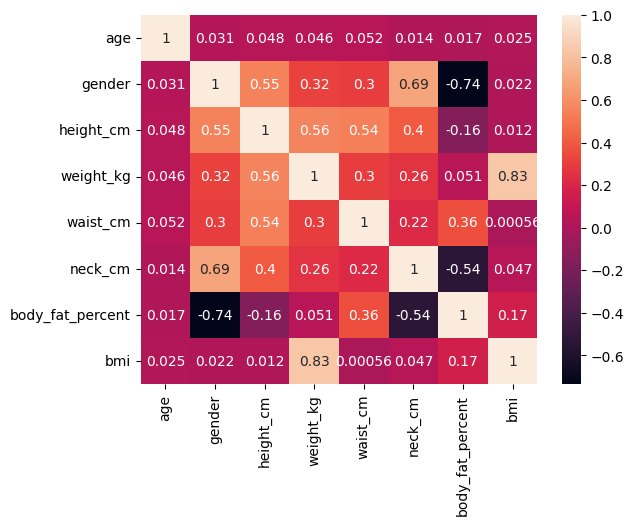

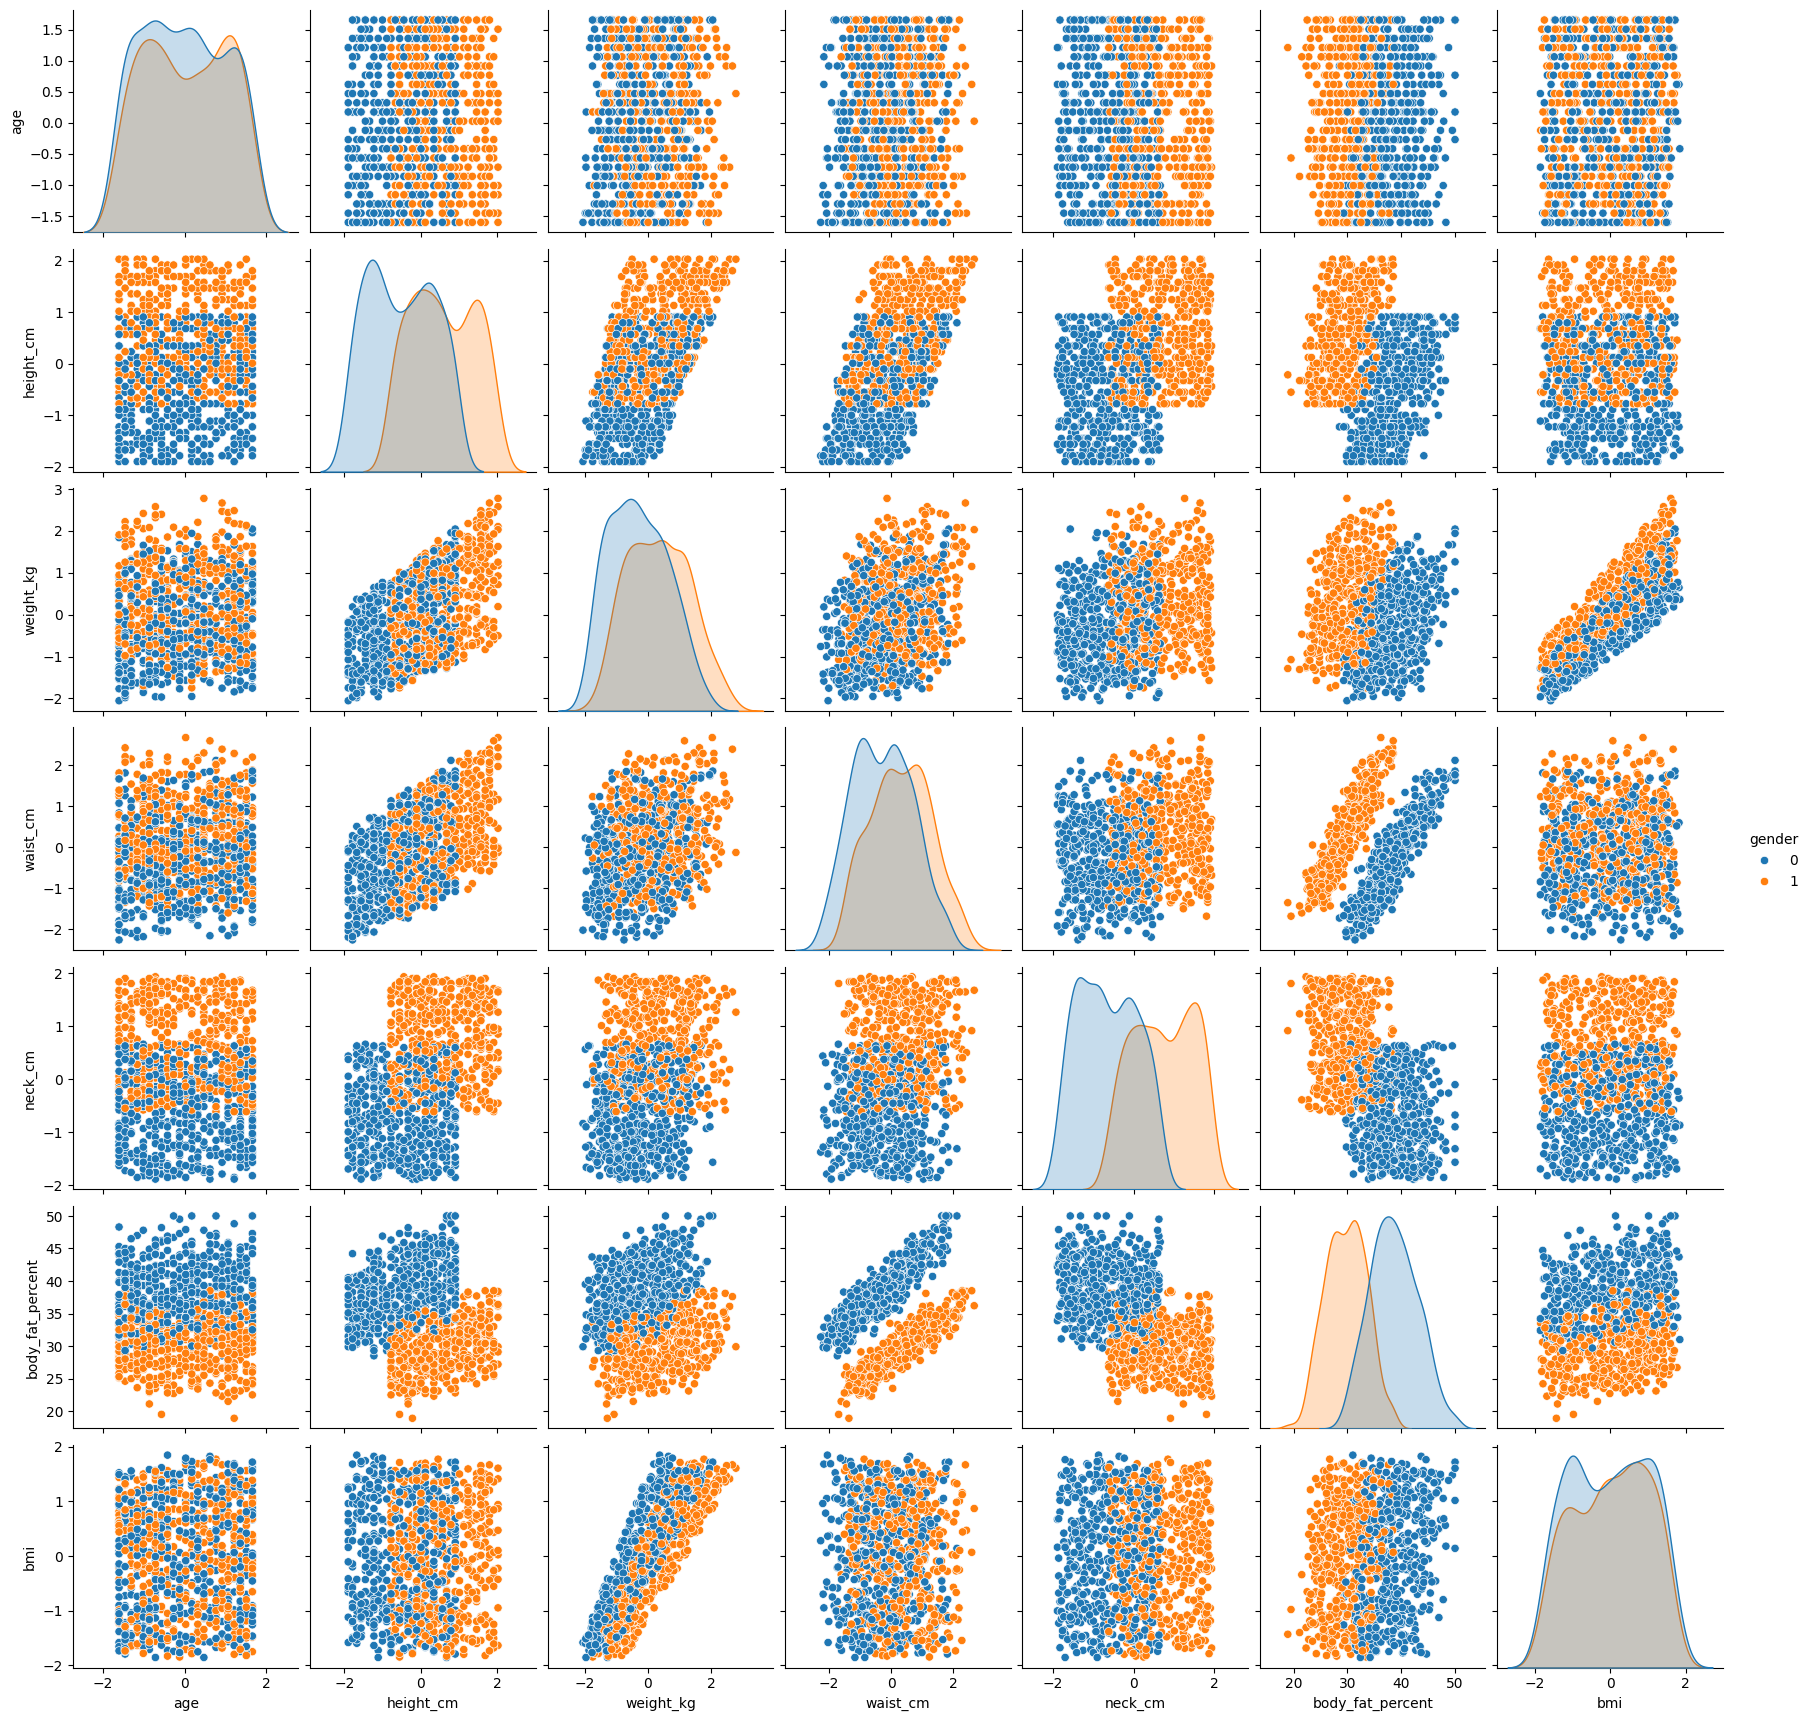

In [8]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load, Engineer & Impute
df = pd.read_csv('sinthetic_bodyfat_data.csv')
df['bmi'] = df.weight_kg / (df.height_cm/100)**2
df.fillna(df.mean(), inplace=True)

print(df.describe(), df.corr()) # Stats

# Scale
cols = ['age', 'height_cm', 'weight_kg', 'waist_cm', 'neck_cm', 'bmi']
df[cols] = StandardScaler().fit_transform(df[cols])

# Plot
sns.heatmap(df.corr(), annot=True)
sns.pairplot(df, hue='gender')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load and Split
df = pd.read_csv('sinthetic_bodyfat_data.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop('gender', axis=1), 
        df.gender, test_size=0.2, random_state=42)

# Scale and Train
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression().fit(X_train, y_train)

# Output
print(f"Accuracy: {model.score(X_test, y_test):.2f}")
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        97

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load, Split & Scale
df = pd.read_csv('sinthetic_bodyfat_data.csv')
X_train, X_test, y_train, y_test = tts(df.drop('gender', axis=1), df.gender, test_size=0.2)

sc = StandardScaler()
X_tr, X_te = sc.fit_transform(X_train), sc.transform(X_test)

# Train & Quick Score
knn = KNeighborsClassifier(5).fit(X_tr, y_train)
print(f"Accuracy: {knn.score(X_te, y_test):.2f}")

Accuracy: 1.00
